# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Baca dataset
anime_df = pd.read_csv("/content/dataset_anime.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,rank
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,Popular
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,Masterpiece
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,Mid-tier
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,Masterpiece
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,Mid-tier


In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
 7   rank      12294 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 768.5+ KB


In [5]:
anime_df.describe(include='all')

,anime_id,name,genre,type,episodes,rating,members,rank
count,12294.000000,12294,12294,12294,12294.000000,12294.000000,1.229400e+04,12294
unique,NaN,12292,3264,6,NaN,NaN,NaN,8
top,NaN,Saru Kani Gassen,Hentai,TV,NaN,NaN,NaN,Niche
freq,NaN,2,885,3812,NaN,NaN,NaN,4919
mean,14058.221653,NaN,NaN,NaN,12.741211,6.475700,1.807134e+04,NaN
std,11455.294701,NaN,NaN,NaN,46.327080,1.017179,5.482068e+04,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.670000,5.000000e+00,NaN
25%,3484.250000,NaN,NaN,NaN,1.000000,5.900000,2.250000e+02,NaN
50%,10260.500000,NaN,NaN,NaN,2.000000,6.570000,1.550000e+03,NaN
75%,24794.500000,NaN,NaN,NaN,12.000000,7.170000,9.437000e+03,NaN


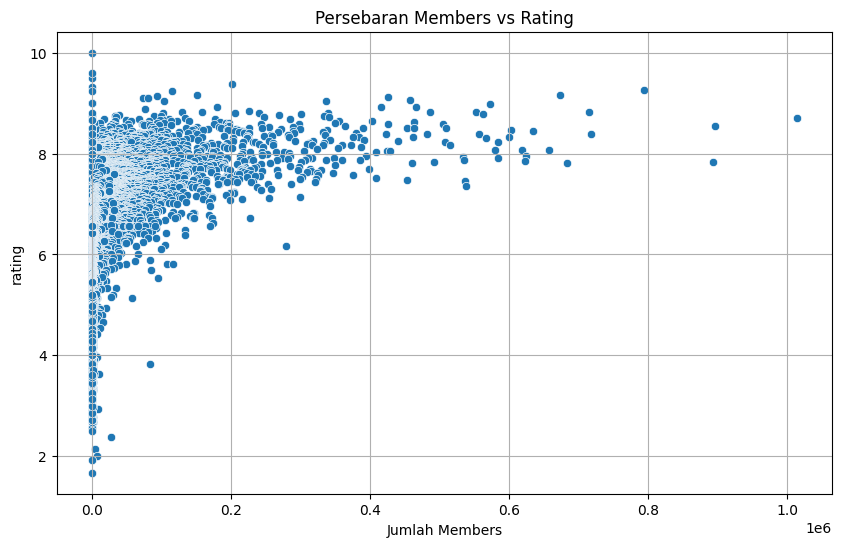

In [6]:
# Scatter plot of members vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anime_df, x='members', y='rating')
plt.title('Persebaran Members vs Rating')
plt.xlabel('Jumlah Members')
plt.ylabel('rating')
plt.grid(True)
plt.show()

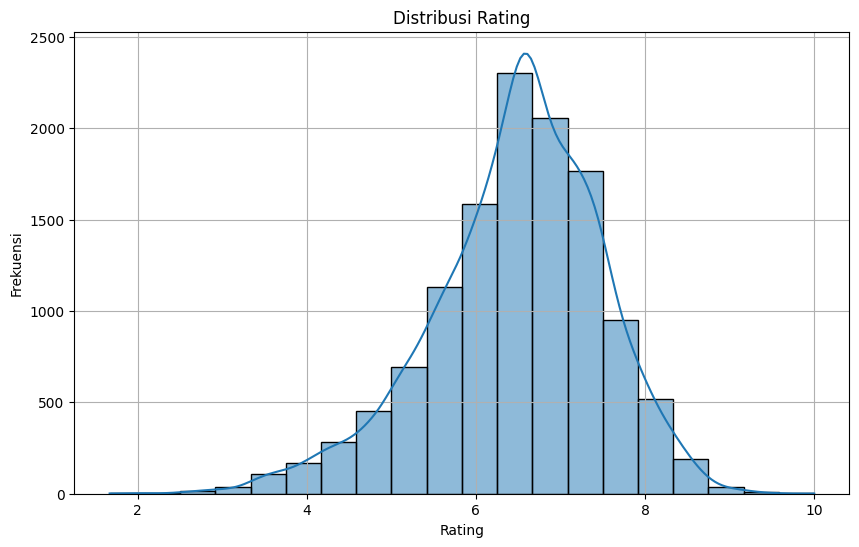

In [7]:
# Histogram of score
plt.figure(figsize=(10, 6))
sns.histplot(data=anime_df, x='rating', kde=True, bins=20)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

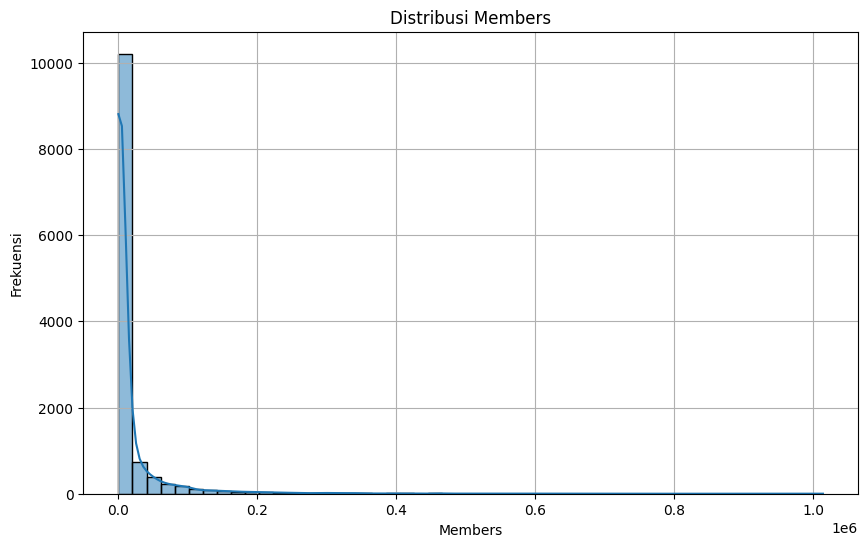

In [8]:
# Histogram of members
plt.figure(figsize=(10, 6))
sns.histplot(data=anime_df, x='members', kde=True, bins=50)
plt.title('Distribusi Members')
plt.xlabel('Members')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

<ipython-input-10-64c5e56560d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anime_df, x='rank', order=anime_df['rank'].value_counts().index, palette='viridis')


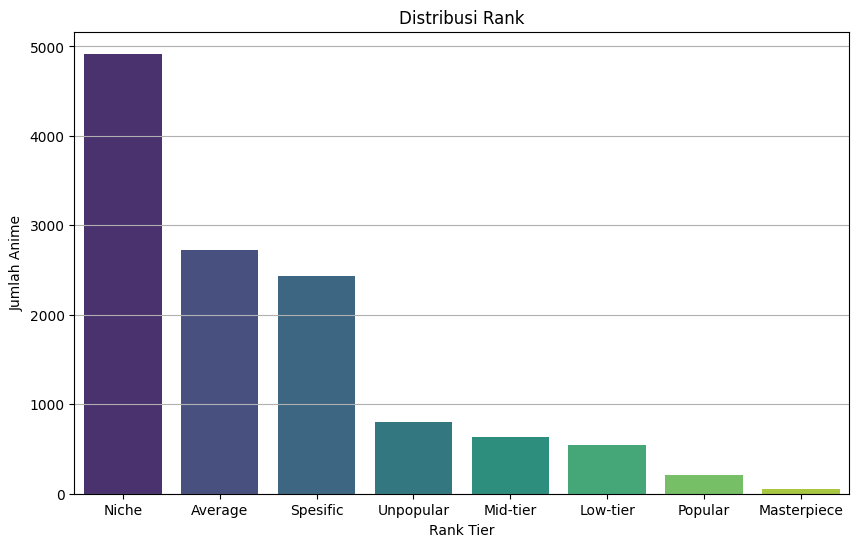

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=anime_df, x='rank', order=anime_df['rank'].value_counts().index, palette='viridis')
plt.title('Distribusi Rank')
plt.xlabel('Rank Tier')
plt.ylabel('Jumlah Anime')
plt.grid(axis='y')
plt.show()

<ipython-input-11-d4c8cd51df22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


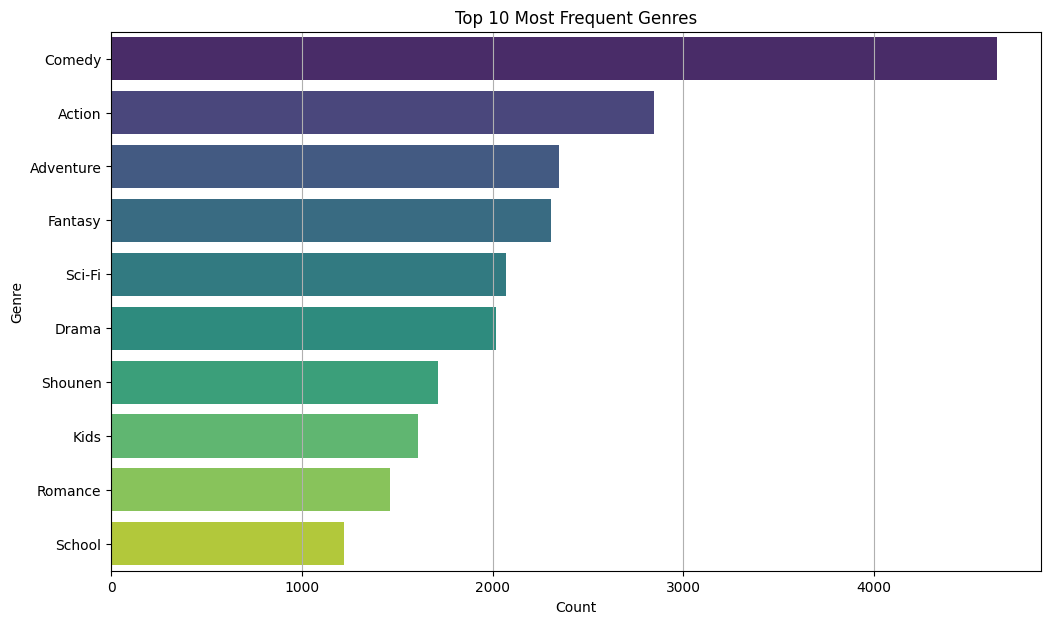

In [11]:
# Since 'genre' can have multiple genres separated by commas, we need to split and count them individually.
genres = anime_df['genre'].dropna().str.split(', ').explode()

# Get the top 10 most frequent genres
top_genres = genres.value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()

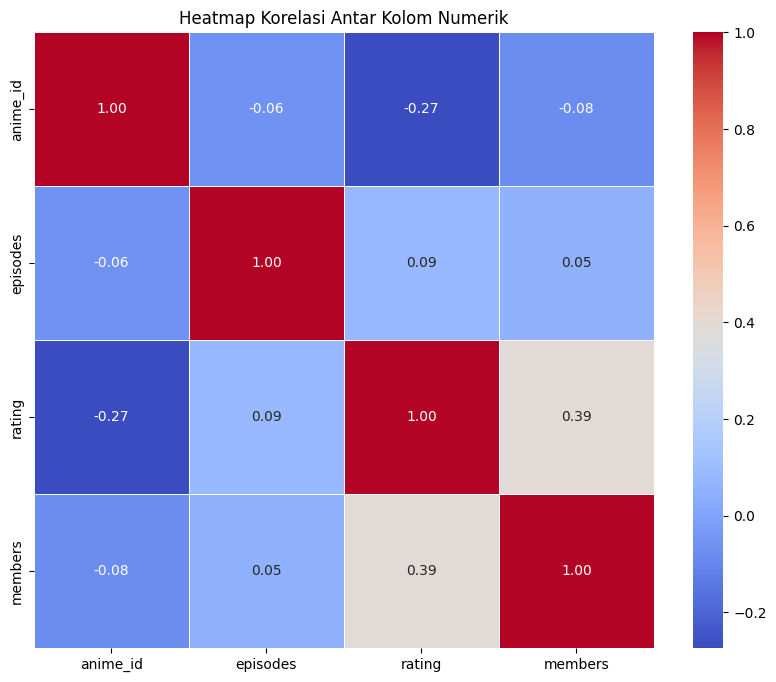

In [12]:
# Select only numerical columns for correlation analysis
numerical_cols = anime_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

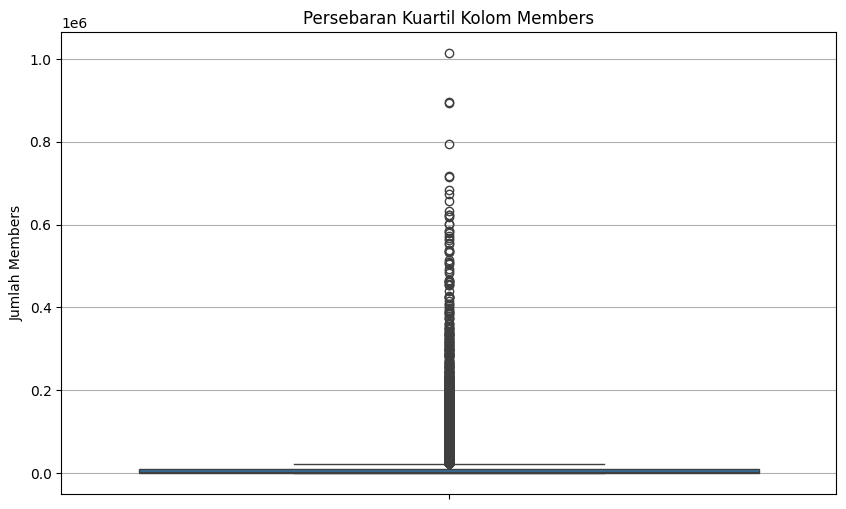

In [13]:
# Box plot for 'members'
plt.figure(figsize=(10, 6))
sns.boxplot(data=anime_df, y='members')
plt.title('Persebaran Kuartil Kolom Members')
plt.ylabel('Jumlah Members')
plt.grid(axis='y')
plt.show()

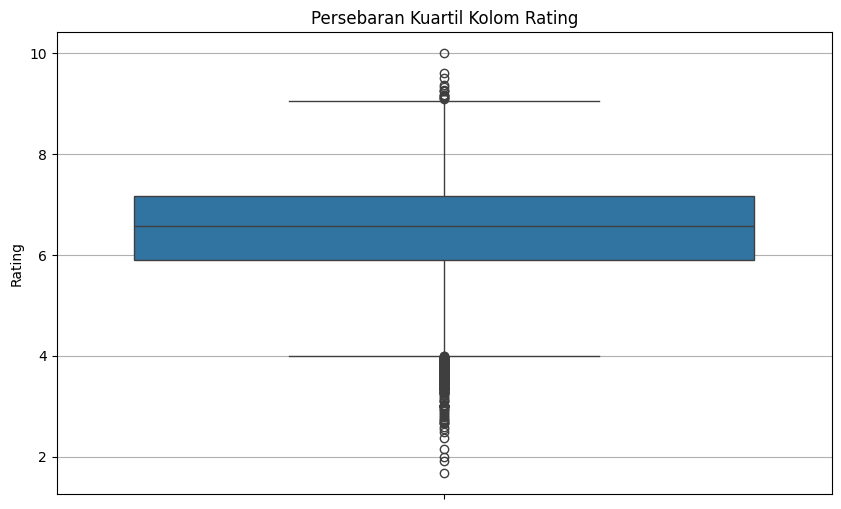

In [14]:
# Box plot for 'rating'
plt.figure(figsize=(10, 6))
sns.boxplot(data=anime_df, y='rating')
plt.title('Persebaran Kuartil Kolom Rating')
plt.ylabel('Rating')
plt.grid(axis='y')
plt.show()

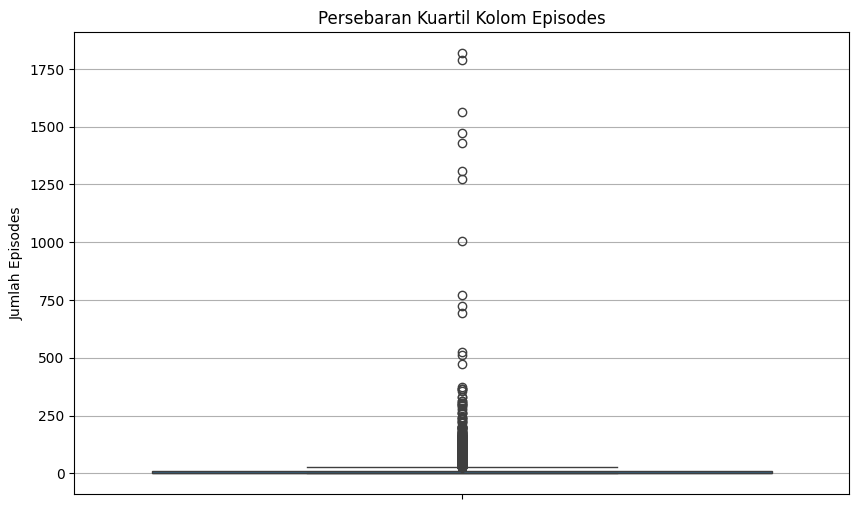

In [15]:
# Box plot for 'episodes'
plt.figure(figsize=(10, 6))
sns.boxplot(data=anime_df, y='episodes')
plt.title('Persebaran Kuartil Kolom Episodes')
plt.ylabel('Jumlah Episodes')
plt.grid(axis='y')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = anime_df.isnull().sum()
missing_values[missing_values > 0]

,0


In [17]:
# Memeriksa jumlah duplikasi di setiap kolom
print("Jumlah duplikasi: ", anime_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
# Inisialisasi Robust Scaler
scaler = RobustScaler()

# Pilih kolom yang akan distandardisasi
features_to_scale = anime_df[['rating', 'members']]

# Terapkan scaler pada kolom yang dipilih
scaled_features = scaler.fit_transform(features_to_scale)

# Buat DataFrame baru dari hasil scaling (opsional, untuk kemudahan visualisasi)
scaled_df = pd.DataFrame(scaled_features, columns=['rating_scaled', 'members_scaled'])

# Tampilkan beberapa baris pertama dari data yang sudah diskalakan
display(scaled_df.head())

,rating_scaled,members_scaled
0,2.204724,21.610942
1,2.118110,85.987299
2,2.110236,12.235345
3,2.047244,72.950716
4,2.039370,16.252280


In [20]:
anime_df.to_csv("dataset_anime_clean.csv", index=False)